In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_demo = pd.read_csv("df_final_demo.txt", sep=",")
df_experiment_clients = pd.read_csv("df_final_experiment_clients.txt", sep=",")
df_web_data_pt_1 = pd.read_csv("df_final_web_data_pt_1.txt", sep=",")
df_web_data_pt_2 = pd.read_csv("df_final_web_data_pt_2.txt", sep=",")

In [2]:
# Ver todas las columnas y sus nombres
print(df_demo.columns)

# Revisar primeras filas
df_demo.head(10)

# Información básica: tipos, nulos
df_demo.info()


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [3]:
import pandas as pd

# Cargar dataset
df_demo = pd.read_csv("df_final_demo.txt", sep=",")

# Mostrar todas las columnas
print("Columnas disponibles en df_demo:")
print(df_demo.columns.tolist())


Columnas disponibles en df_demo:
['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']


In [21]:
# Mostrar las primeras 10 filas
pd.set_option('display.max_columns', None)  # Para que no corte columnas
df_demo.head(10)


,client_id,tenure_yr,tenure_mnth,clnt_age,gender,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0


In [5]:
# Tipos y valores nulos
df_demo.info()

# Estadísticas básicas de columnas numéricas
df_demo.describe()

# Estadísticas básicas de columnas categóricas (object)
categorical_cols = df_demo.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df_demo[col].value_counts(dropna=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB

Unique values in gendr:
gendr
U      24122
M      23724
F      22746
NaN       14
X          3
Name: count, dtype: int64


In [6]:
df_web_data_pt_1.columns
df_web_data_pt_2.columns


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [7]:
df_web = pd.concat(
    [df_web_data_pt_1, df_web_data_pt_2],
    axis=0,
    ignore_index=True
)


In [8]:
df_web.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [9]:
df_web.duplicated().sum()

np.int64(10764)

In [10]:
df_web_clean = df_web.drop_duplicates()

In [11]:
# Conteo de visitas/eventos por cliente
client_counts = df_web['client_id'].value_counts()

# Mostrar los 10 clientes con más eventos
print("Top 10 clientes con más interacciones:")
print(client_counts.head(10))


Top 10 clientes con más interacciones:
client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
1952790     80
9800867     75
7733877     72
465007      72
3545814     72
Name: count, dtype: int64


In [12]:
# Tomamos solo un registro por cliente en web (clientes únicos)
df_clients_web = df_web[['client_id']].drop_duplicates()

# Hacemos merge con df_demo para obtener variables demográficas
df_clients = df_clients_web.merge(
    df_demo,
    on='client_id',
    how='left'
)

# Revisar primeros registros
df_clients.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0


Mean Age: 46.442240133722414


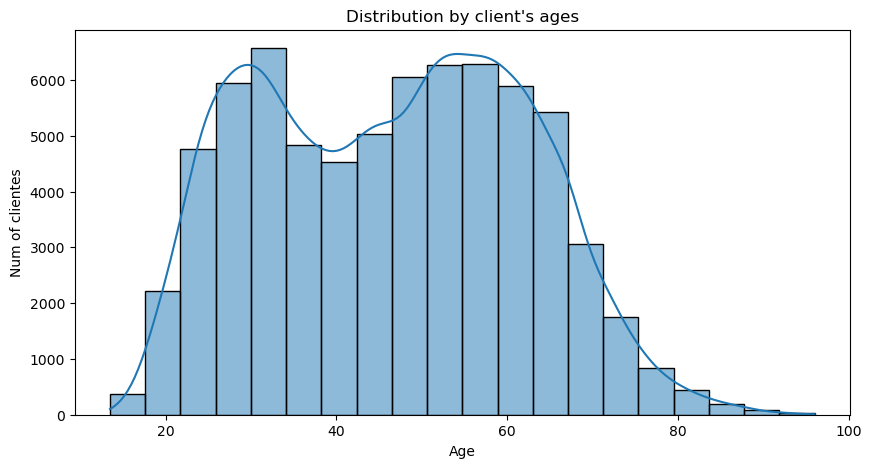

age_group
50-64    22345
35-49    18429
25-34    14551
65+       8705
<25       6564
Name: count, dtype: int64


In [14]:
# Edad promedio y distribución
print("Mean Age:", df_clients['clnt_age'].mean())

# Histograma de edad
plt.figure(figsize=(10,5))
sns.histplot(df_clients['clnt_age'], bins=20, kde=True)
plt.title("Distribution by client's ages")
plt.xlabel("Age")
plt.ylabel("Num of clientes")
plt.show()

# Crear grupos de edad
bins = [0, 25, 35, 50, 65, 100]
labels = ['<25', '25-34', '35-49', '50-64', '65+']
df_clients['age_group'] = pd.cut(df_clients['clnt_age'], bins=bins, labels=labels)

# Conteo por grupo de edad
print(df_clients['age_group'].value_counts())


customer_type
Recurrente    120157
Name: count, dtype: int64


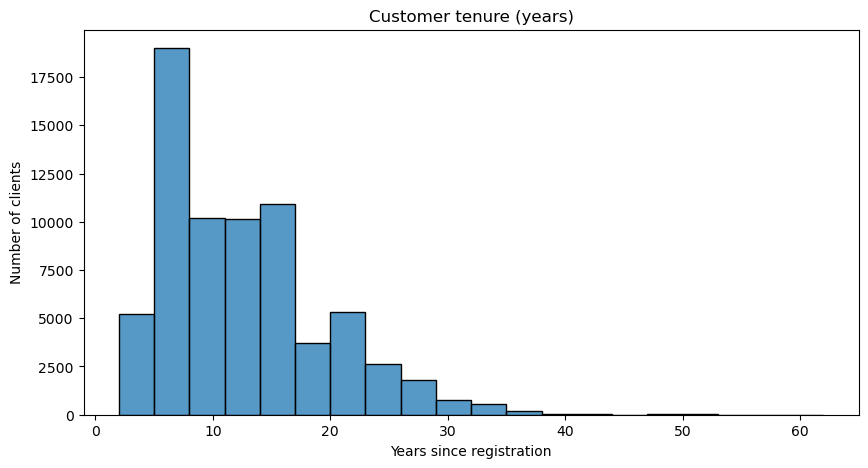

In [17]:
df_clients['customer_type'] = df_clients['clnt_tenure_yr'].apply(lambda x: 'Nuevo' if x<1 else 'Recurrente')
print(df_clients['customer_type'].value_counts())

# Histograma
plt.figure(figsize=(10,5))
sns.histplot(df_clients['clnt_tenure_yr'], bins=20)
plt.title("Customer tenure (years)")
plt.xlabel("Years since registration")
plt.ylabel("Number of clients")
plt.show()



gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64


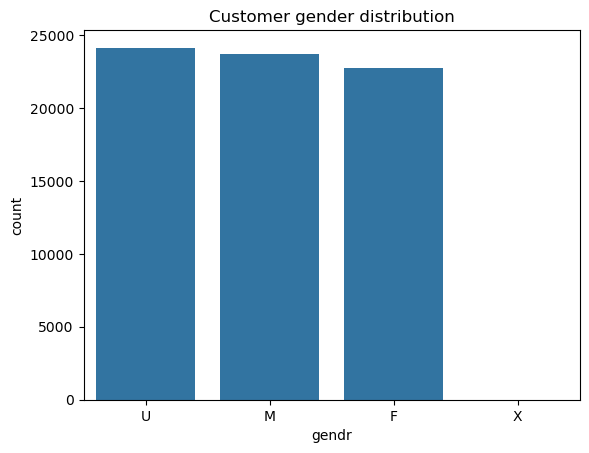

In [18]:
print(df_clients['gendr'].value_counts())

sns.countplot(data=df_clients, x='gendr')
plt.title("Customer gender distribution")
plt.show()


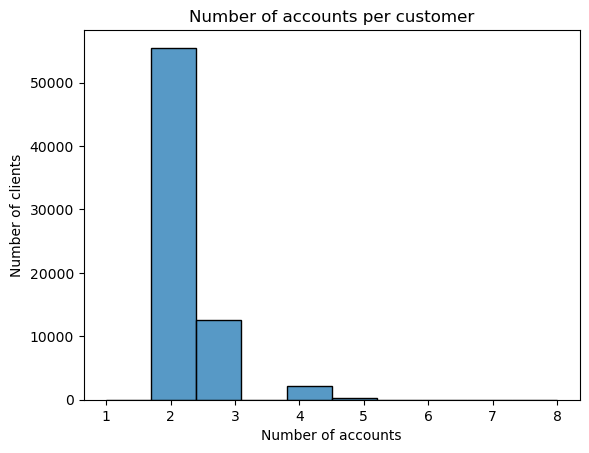

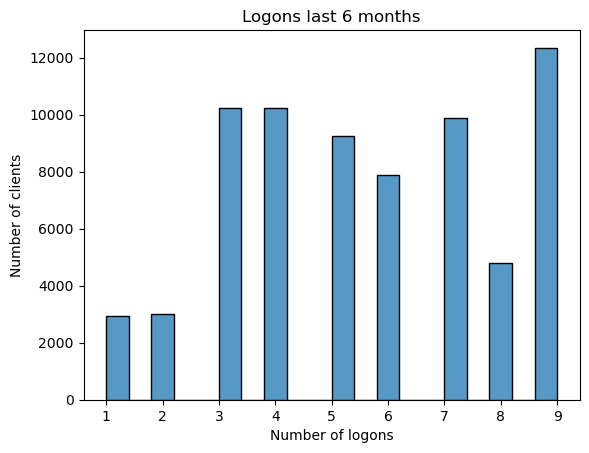

In [19]:
# Número de cuentas
sns.histplot(df_clients['num_accts'], bins=10)
plt.title("Number of accounts per customer")
plt.xlabel("Number of accounts")
plt.ylabel("Number of clients")
plt.show()

# Logons últimos 6 meses
sns.histplot(df_clients['logons_6_mnth'], bins=20)
plt.title("Logons last 6 months")
plt.xlabel("Number of logons")
plt.ylabel("Number of clients")
plt.show()
